## 1. Import Libraries

In [2]:
import pandas as pd
import csv
import json
from collections import Counter

## 2. Load data

In [3]:
file1 = "/Users/fridahntika/Documents/CS315/Project 3/CS315-Project3-Group2/Data/results_10633.csv"
file2 = "/Users/fridahntika/Documents/CS315/Project 3/CS315-Project3-Group2/Data/results_10824_full.csv"
file3 = "/Users/fridahntika/Documents/CS315/Project 3/CS315-Project3-Group2/Data/results_12345_full.csv"
file4 = "/Users/fridahntika/Documents/CS315/Project 3/CS315-Project3-Group2/Data/results_26301.csv"
file5 = "/Users/fridahntika/Documents/CS315/Project 3/CS315-Project3-Group2/Data/results_33534.csv"
file6 = "/Users/fridahntika/Documents/CS315/Project 3/CS315-Project3-Group2/Data/results_38129.csv"
file7 = "/Users/fridahntika/Documents/CS315/Project 3/CS315-Project3-Group2/Data/results_50405_full.csv"
file8 = "/Users/fridahntika/Documents/CS315/Project 3/CS315-Project3-Group2/Data/Sec2Gr3_74721.csv"
file9 = "/Users/fridahntika/Documents/CS315/Project 3/CS315-Project3-Group2/Data/Sec2Gr3_77217.csv"
file10 = "/Users/fridahntika/Documents/CS315/Project 3/CS315-Project3-Group2/Data/Sec2Gr3_77777.csv"

In [4]:
# Lists that will store video IDs for each user's viewed posts
list1 = []
list2 = []
list3 = []
list4 = []
list5 = []
list6 = []
list7 = []
list8 = []
list9 = []
list10 = []

In [166]:
data = pd.read_csv(file5)
posts = pd.DataFrame(data)
#posts.shape
#posts.head()

In [167]:
#clean the data
posts = posts[posts['video_description'].notna()]
posts = posts[posts['video_locationcreated'] == 'US']
#posts.shape

In [34]:
#storing the ids
for id in posts['video_id']:
    list1.append(id)

In [35]:
#dictionary that counts how many overlapping videos there are between users
overlaps = {'1 & 2': 0,'1 & 3': 0,'1 & 4': 0,'1 & 5': 0,'1 & 6': 0,'1 & 7': 0,'1 & 8': 0,'1 & 9': 0,'1 & 10': 0,
           '2 & 3': 0, '2 & 4': 0, '2 & 5': 0, '2 & 6': 0, '2 & 7': 0, '2 & 8': 0, '2 & 9': 0,'2 & 10': 0,
           '3 & 4': 0, '3 & 5': 0, '3 & 6': 0, '3 & 7': 0, '3 & 8': 0, '3 & 9': 0, '3 & 10': 0,
           '4 & 5': 0,'4 & 6': 0,'4 & 7': 0,'4 & 8': 0,'4 & 9': 0,'4 & 10': 0,
           '5 & 6': 0,'5 & 7': 0,'5 & 8': 0,'5 & 9': 0,'5 & 10': 0,
           '6 & 7': 0, '6 & 8': 0,'6 & 9': 0,'6 & 10': 0,
           '7 & 8': 0,'7 & 9': 0,'7 & 10': 0,
           '8 & 9': 0,'8 & 10': 0,
           '9 & 10': 0}

In [44]:
for video in list1:
    if video in list10:
        overlaps['1 & 10'] += 1

In [52]:
for video in list2:
    if video in list10:
        overlaps['2 & 10'] += 1

In [59]:
for video in list3:
    if video in list10:
        overlaps['3 & 10'] += 1

In [65]:
for video in list4:
    if video in list10:
        overlaps['4 & 10'] += 1

In [70]:
for video in list5:
    if video in list10:
        overlaps['5 & 10'] += 1

In [74]:
for video in list6:
    if video in list10:
        overlaps['6 & 10'] += 1

In [77]:
for video in list7:
    if video in list10:
        overlaps['7 & 10'] += 1

In [79]:
for video in list8:
    if video in list10:
        overlaps['8 & 10'] += 1

In [80]:
for video in list9:
    if video in list10:
        overlaps['9 & 10'] += 1

In [85]:
overlaps = sorted(overlaps.items(), key=lambda item: item[1], reverse=True)

AttributeError: 'list' object has no attribute 'items'

In [86]:
overlaps

[('3 & 7', 834),
 ('8 & 9', 548),
 ('3 & 4', 287),
 ('3 & 5', 286),
 ('7 & 8', 284),
 ('7 & 9', 247),
 ('3 & 8', 236),
 ('3 & 9', 234),
 ('5 & 7', 174),
 ('2 & 3', 101),
 ('4 & 5', 95),
 ('2 & 5', 79),
 ('2 & 4', 47),
 ('9 & 10', 40),
 ('2 & 7', 29),
 ('3 & 10', 29),
 ('7 & 10', 24),
 ('5 & 8', 19),
 ('4 & 7', 18),
 ('8 & 10', 17),
 ('5 & 9', 11),
 ('2 & 9', 10),
 ('2 & 8', 6),
 ('4 & 8', 4),
 ('4 & 6', 3),
 ('4 & 9', 3),
 ('2 & 10', 2),
 ('3 & 6', 1),
 ('5 & 10', 1),
 ('1 & 2', 0),
 ('1 & 3', 0),
 ('1 & 4', 0),
 ('1 & 5', 0),
 ('1 & 6', 0),
 ('1 & 7', 0),
 ('1 & 8', 0),
 ('1 & 9', 0),
 ('1 & 10', 0),
 ('2 & 6', 0),
 ('4 & 10', 0),
 ('5 & 6', 0),
 ('6 & 7', 0),
 ('6 & 8', 0),
 ('6 & 9', 0),
 ('6 & 10', 0)]

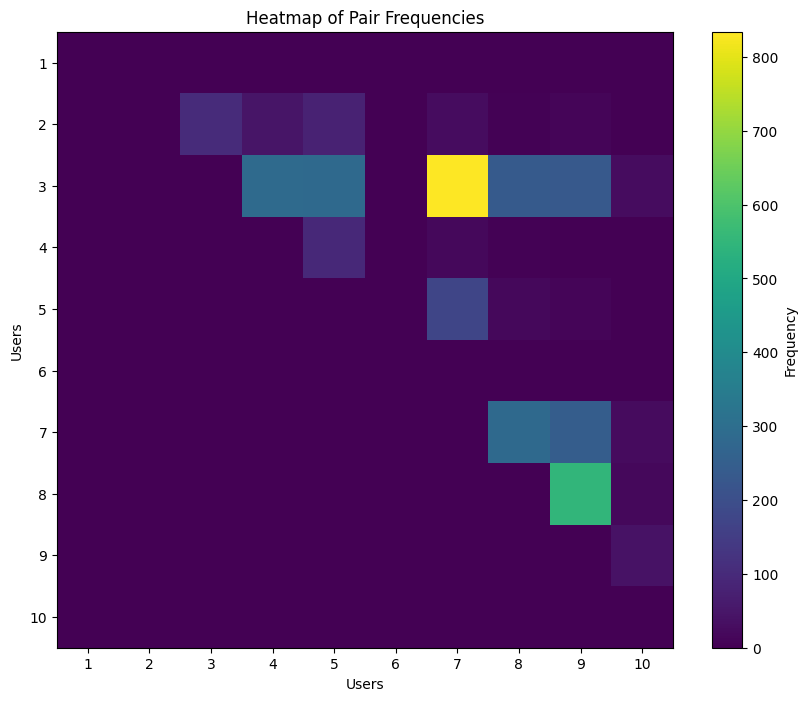

In [138]:
import numpy as np
import matplotlib.pyplot as plt

# Create matrix
matrix = np.zeros((10, 10))

# Fill matrix with frequencies
for pair, freq in overlaps:
    i, j = map(int, pair.split(' & '))
    matrix[i-1][j-1] = freq

# Create heatmap
plt.figure(figsize=(10, 8))
plt.imshow(matrix, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Frequency')
plt.title('Heatmap of Pair Frequencies')
plt.xlabel('Users')
plt.ylabel('Users')
plt.xticks(np.arange(10), np.arange(1, 11))
plt.yticks(np.arange(10), np.arange(1, 11))
plt.show()

In [ ]:
#posts2 = posts.groupby('video_id').agg('count').reset_index()
#posts2.columns = ['video_id','count' ]
#posts2

In [ ]:
#dictCount = Counter(list5)
#len(dictCount)

In [163]:
#add all the descriptions to one list
#sentences = posts['video_description'].tolist() + posts['suggested_words'].tolist()
#len(sentences)

94

In [168]:
# Combine two columns into one flat list
sentences = sum(posts[['video_description', 'suggested_words']].values.tolist(), [])
len(sentences)

9042

In [162]:
#save to file
with open('user1.json', 'w') as fout:
    json.dump(sentences, fout)